
# Получение данных через API 
  


# Зачем нужны API

`API` для аналитика это инструмент связи с данными, которые находятся внутри сторонних сайтов. Через API мы передаем команды-запросы, а взамен получаем ответ. Все API разные, но есть общие подходы

- у большинства API есть адрес, по которому нужно отправить запрос
- в документации указаны определенные требования к структуре запроса

### Почему нельзя просто парсить сайты?

Вообще-то можно, но если вы напишете робота, который прорывается через визуальный интерфейс и создает лишнюю нагрузку на сайт, то вас просто забанят.

`Визуальный интерфейс` сайтов для пользователей — он нагружен разнообразными стилями и картинками, похоже на парадный вход с красивым и внимательным консьержем, который физически не успеет обслужить роботизированный поток из тысяч запросов. 

`API` —  интерфейс для программ — как служебный вход, который снимает лишнюю нагрузку с парадного, созданного для пользователей, он не такой красивый, зато шире.

Хотя и этот служебный вход не резиновый и API прописывают `ограничения` запросов, которые можно создавать. Часто, например, владельцы API просят нас ограничить частоту обращений к сервису или объем получаемых данных.

### Открытые и закрытые API

`Открытые` — общедоступные (например, API Мирового банка). [Список публичных API](https://github.com/public-apis/public-apis)

`Закрытые` — требующие разнообразных процедур авторизации (например, API Google Drive). 

### Что можно получить от API сайтов?

Чаще всего возвращают данные в формате `json`, с которым мы и будем работать, или реже `xml`. 




## JSON

`JSON` — текстовый формат данных из `JavaScript`, но многие среды программирования имеют возможность читать и генерировать JSON, в том числе Python.

Работая с модулем `requests`, мы будем использовать метод `json()`, который преобразует ответ в объект класса `dict`. 

Подробнее: https://python-scripts.com/json

___

## Открытые API

### Задача 1 

Получаем время восхода и заката по координатам

#### Как это сделать?

1. Изучить документацию API сайта `https://sunrise-sunset.org/`
2. Получить координаты города в нужном формате
3. Отправить запрос сайту `https://sunrise-sunset.org/`, на котором есть нужные нам данные
4. Получить ответ 

__Идем на сайт, ищем страницу с документацией `API` [`https://sunrise-sunset.org/`](https://sunrise-sunset.org/) и находим ответы на главные вопросы__

1. Какие параметры, то есть данные, мы можем получить через этот API
2. В каком формате этот API принимает запрос
3. В каком формате возвращается ответ

__Мы поняли, что на вход нам понадобятся:__

1. две координаты в формате `float`
2. дата, данные за которую мы хотим получить

### 1. Получим координаты
Библиотека `geocoder` поможет нам получить координаты по географическому названию.

In [1]:
#!pip install geocoder

import sys
!{sys.executable} -m pip install geocoder 


     -------------------------------------- 98.6/98.6 kB 631.1 kB/s eta 0:00:00


In [ ]:
import geocoder

Из нее возьмем функцию `.arcgis()`, которая возвращает всю информацию о переданном географическом названии.

In [7]:
city = geocoder.arcgis('Иркутск')
print(city.json)

{'address': 'Иркутск, Иркутская область', 'bbox': {'northeast': [52.46625, 104.41285], 'southwest': [52.13425, 104.08085]}, 'confidence': 1, 'lat': 52.30025000000006, 'lng': 104.24685000000005, 'ok': True, 'quality': 'Locality', 'raw': {'name': 'Иркутск, Иркутская область', 'extent': {'xmin': 104.08085, 'ymin': 52.13425, 'xmax': 104.41285, 'ymax': 52.46625}, 'feature': {'geometry': {'x': 104.24685000000005, 'y': 52.30025000000006}, 'attributes': {'Score': 100, 'Addr_Type': 'Locality'}}}, 'score': 100, 'status': 'OK'}


Широта — это `lat`, долгота — `lng`.

Создадим список, в который положим наши широту и долготу. Но вообще, мы можем сохранить их в любом удобном формате.

In [8]:
crdnt = [city.json['lat'], city.json['lng']]
print(crdnt)

[52.30025000000006, 104.24685000000005]


### 2. Создадим запрос 

`requests` — библиотека инструментов для обмена информацией по интернету. С ее помощью можно легко и быстро подключаться к сайтам, забирать оттуда информацию, отправлять туда какую-то информацию (например, логин и пароль для авторизации). В работе аналитика эта библиотека чаще всего используется для получения данных из сети.

Для этого используется функция `get()`, которая получает на вход URL API и параметры запроса в формате словаря

Снова идем в документацию: https://sunrise-sunset.org/api, чтобы 

1. вспомнить, через какую ссылку мы обращаемся к нему
2. вспомнить имена параметров

In [9]:
import requests

In [11]:
URL = 'https://api.sunrise-sunset.org/json'
params = {
    'lat': crdnt[0], # берем первый элемент из списка
    'lng': crdnt[1], # берем второй элемент из списка
    'date': '2024-03-22'
}

sun_r_s = requests.get(URL, params=params) # requests за нас формирует конечный URL из параметров

sun_r_s

<Response [200]>

`<Response [200]>` - означает, что все верно. 

Чтобы посмотреть, что внутри ответа, используем метод `.content` 

In [12]:
sun_r_s.content

b'{"results":{"sunrise":"10:58:20 PM","sunset":"11:21:17 AM","solar_noon":"5:09:48 AM","day_length":"12:22:57","civil_twilight_begin":"10:26:06 PM","civil_twilight_end":"11:53:31 AM","nautical_twilight_begin":"9:45:44 PM","nautical_twilight_end":"12:33:53 PM","astronomical_twilight_begin":"9:03:24 PM","astronomical_twilight_end":"1:16:13 PM"},"status":"OK","tzid":"UTC"}'

Мы получили строку в формате `JSON`. Ее можно преобразовать в словарь методом `.json` и после этого обращаться к различным полям.

In [13]:
sun_r_s_dict = sun_r_s.json()
sun_r_s_dict

{'results': {'sunrise': '10:58:20 PM',
  'sunset': '11:21:17 AM',
  'solar_noon': '5:09:48 AM',
  'day_length': '12:22:57',
  'civil_twilight_begin': '10:26:06 PM',
  'civil_twilight_end': '11:53:31 AM',
  'nautical_twilight_begin': '9:45:44 PM',
  'nautical_twilight_end': '12:33:53 PM',
  'astronomical_twilight_begin': '9:03:24 PM',
  'astronomical_twilight_end': '1:16:13 PM'},
 'status': 'OK',
 'tzid': 'UTC'}

In [14]:
type(sun_r_s_dict)

dict

Например, получим продолжительность дня, обратившись к значению внутреннего словаря по ключу `'day_length'`

In [15]:
sun_r_s_dict['results']['day_length']

'12:22:57'

Если нужно, преобразуем ответ в датафрейм, передав методу `pd.DataFrame` внутренний словарь

In [16]:
import pandas as pd

pd.DataFrame([sun_r_s.json()['results']])

,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end
0,10:58:20 PM,11:21:17 AM,5:09:48 AM,12:22:57,10:26:06 PM,11:53:31 AM,9:45:44 PM,12:33:53 PM,9:03:24 PM,1:16:13 PM


___

## API World Bank

Рассмотрим работу с `API Мирового Банка`. Там мы найдем гигабайты данных, описывающих разные экономические и социальные показатели сотен стран. 

Это тоже открытый API. Перейдем на сайт [документации](https://datahelpdesk.worldbank.org/knowledgebase/topics/125589) к нему. Документация гораздо больше и сложнее. Разберемся, как она устроена.

### Best Practices

Тут перечислены разделы с информацией о том, как следует пользоваться API. Первым делом идем в раздел [Development Best Practices](https://datahelpdesk.worldbank.org/knowledgebase/articles/902064-development-best-practices). Тут собраны рекомендации по использованию API и ограничения. Хороший тон — соблюдать их. Несоблюдение таких рекомендаций может привести к поломке сервиса и бану вашего IP.

__Две главные рекомендации:__
1. Кэшировать информацию — сохранять результаты предыдущих запросов, чтобы не ходить в API без необходимости несколько раз.
2. Не делать повторных запросов при задержке ответа. Если при задержке ответа в связи с загрузкой сервера запрашивать сервис еще и еще, это приведет только к еще большей нагрузке на сервер.

### Описание интерфейса

Далее рассмотрим, какие ошибки может выдавать API, чтобы понимать, как их обрабатывать.

<table><tbody><tr><th class="wysiwyg-tmp-selected-cell">Error Code</th><th>Response Code</th><th>Description</th></tr><tr><td>105</td><td>503 'Service currently unavailable'</td><td>'The requested service is temporarily unavailable.'</td></tr><tr><td>110</td><td>404 'API Version "XXX" not found.'</td><td>'The requested API version was not found.'</td></tr><tr><td>111</td><td>404 'Format "XXX" not found.'</td><td>'The requested response format was not found.'</td></tr><tr><td>112</td><td>404 'Method "XXX" not found.'</td><td>'The requested method was not found.'</td></tr><tr><td>115</td><td>404 'Missing required parameter'</td><td>'Parameters which are required have not been sent.'</td></tr><tr><td>120</td><td>404 'Parameter "XXX" has an invalid value.'</td><td>'The provided parameter value is not valid.'</td></tr><tr><td>140</td><td>400 'Endpoint “XXX” not found.’</td><td>'The requested endpoint was not found'</td></tr><tr><td>150</td><td>400 'Language with ISO2 code: "XX" is not yet supported in the API'</td><td>'Response requested in an unsupported language.'</td></tr><tr><td>160</td><td>400 ' Filtering data-set on an indicator value without indicating a date range is meaningless and is not allowed.'</td><td>'You need to indicate date-range if you want to filter by an indicator value.'</td></tr><tr><td>199</td><td>500 'Unexpected error'</td><td>'An unexpected error was encountered while processing the request.'</td></tr></tbody></table>

При успешном запросе обычно мы получаем желанный код 200.

### Доступ к списку показателей (индикаторов)

Чтобы узнать какие показатели мы можем запросить, перейдем на [страницу](https://datahelpdesk.worldbank.org/knowledgebase/articles/898599-indicator-api-queries) с описанием соответствующего интерфейса.

Чтобы получить данные обо всех индикаторах, мы должны запросить API по такому адресу:

http://api.worldbank.org/v2/indicator

Чтобы получить данные в формате JSON, надо добавить `?format=json`

Скопируем в адресную строку браузера и посмотрим, что будет:

http://api.worldbank.org/v2/indicator?format=json

Мы получили огромный массив какого-то текста. Посмотрим, как он будет выглядеть в виде таблиц. Документация обещает такие данные:

* код
* название
* единицы измерения
* ID источника
* описание источника
* название организации, предоставляющей данные
* ID темы
* название темы


Часть `?format=json` — это параметры запроса. Вы можете их видеть в URL после символа `?`. Присмотритесь к ссылкам в своем браузере и, возможно, найдете там что-то интересное. 

`Requests` позволяет указывать параметры в виде словаря, а не приклеивать их к URL в виде текста. 

Для доступа к API снова воспользуемся функцией `get()` из  библиотеки `requests` и передадим ей два параметра:

1. `url = http://api.worldbank.org/v2/indicator`
2. `params = {'format':'json'}`

___

In [17]:
import requests
import pandas as pd

In [18]:
INDICATORS_URL = "http://api.worldbank.org/v2/indicator"

In [19]:
indicators = requests.get(url=INDICATORS_URL # ссылка на API
                          , params={'format':'json'} # параметры запроса
                         )

Выведем результат.

In [24]:
indicators

<Response [200]>

Мы не видим огромного массива текста как в браузере. Вместо этого мы видим код ответа API. И к нашему удовлетворению он равен 200, что значит, запрос получен и успешно обработан. 

А содержимое ответа хранится в `indicators.content`

In [25]:
indicators.content

b'[{"page":1,"pages":489,"per_page":"50","total":24402},[{"id":"1.0.HCount.1.90usd","name":"Poverty Headcount ($1.90 a day)","unit":"","source":{"id":"37","value":"LAC Equity Lab"},"sourceNote":"The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.","sourceOrganization":"LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).","topics":[{"id":"11","value":"Poverty "}]},{"id":"1.0.HCount.2.5usd","name":"Poverty Headcount ($2.50 a day)","unit":"","source":{"id":"37","value":"LAC Equity Lab"},"sourceNote":"The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.","sourceOrganization":"LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).","topics":[{"id":"11","value":"Poverty "}]},{"id":"1.0.HCount.Mid10to50","name":"Middle Class ($10-50 a day) Headcount","unit":"","source":{"id":"37","value":"LAC Equity La

С помощью `библиотеки json` мы можем преобразовать данные в более привычный формат. Для этого импортируем библиотеку и вызовем оттуда метод  `.loads()`, который отдаст список с вложенными словарями.

In [26]:
import json

In [28]:
indicators_data = json.loads(indicators.content)
indicators_data

[{'page': 1, 'pages': 489, 'per_page': '50', 'total': 24402},
 [{'id': '1.0.HCount.1.90usd',
   'name': 'Poverty Headcount ($1.90 a day)',
   'unit': '',
   'source': {'id': '37', 'value': 'LAC Equity Lab'},
   'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
   'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
   'topics': [{'id': '11', 'value': 'Poverty '}]},
  {'id': '1.0.HCount.2.5usd',
   'name': 'Poverty Headcount ($2.50 a day)',
   'unit': '',
   'source': {'id': '37', 'value': 'LAC Equity Lab'},
   'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.',
   'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
   'topics': [{'id': '11', 'value': 'Poverty '}]},
  {'id': '1.0.HCount.Mid10to50',
   'name':

Мы получили одну страницу с 50 показателями. 
Документация обещает, что ответ будет в виде списка, где первый элемент описывает данные, а второй содержит их:
    
```json
[{
  "page": 1,
  "pages": 1,
  "per_page": "50",
  "total": 1
  },
  [{
    "id": "NY.GDP.MKTP.CD","name":
    "GDP (current US$)",
    "unit": "",
    "source": {
      "id": "2",
      "value": "World Development Indicators"},
    "sourceNote": "GDP at purchaser's prices ... ",
    "sourceOrganization": "World Bank national accounts data, and OECD National Accounts data files.",
    "topics": [
      {"id": "19","value": "Climate Change"},
      {"id": "3","value": "Economy & Growth"}
    ]
  }]
]
```
    
Проверим это и посмотрим, что у нас лежит в `indicators_data`

In [29]:
type(indicators_data) 

list

Отлично, мы поняли, что внутри лежит список, давайте посмотрим его длину

In [30]:
len(indicators_data)

2

В списке всего 2 элемента, посмотрим на них по очереди. 

In [31]:
indicators_data[0] # в первом элементе списка — метаданные.

{'page': 1, 'pages': 489, 'per_page': '50', 'total': 24402}

In [21]:
indicators_data[1] # во втором — сами данные, это страндартная практика.

[{'id': '1.0.HCount.1.90usd',
  'name': 'Poverty Headcount ($1.90 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.2.5usd',
  'name': 'Poverty Headcount ($2.50 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.Mid10to50',
  'name': 'Middle Class ($10-50 a day) Headcount',
  'unit': '',
  'source': {'id': '37

In [22]:
len(indicators_data[1])

50

В описании данных мы видим, что всего показателей 20083, попробуем получить все показатели.

In [27]:
indicators = requests.get(url=INDICATORS_URL # ссылка на API
                          , params={'format':'json','per_page':20083} # параметры запроса
                         )
# вместо числа 20083 можно передать ссылку на это же значение, например вот так:  indicators_data[0]['total'] 

Всё получилось!

In [32]:
indicators

<Response [200]>

По правилам хорошего тона закрываем соединение с сервером методом `.close()`, и дальше будем работать с полученными данными

In [33]:
indicators.connection.close()

Чтобы было удобнее изучать данные, можно записать их в DataFrame

In [34]:
indicators_data = json.loads(indicators.content) # приводим к списку с вложенными словарями
indicators_data[0] # первый элемент — словарь с описанием данных

{'page': 1, 'pages': 489, 'per_page': '50', 'total': 24402}

Как и в прошлый раз, используем `pd.DataFrame`

In [35]:
indicators_df = pd.DataFrame(indicators_data[1]) # берем второй элемент — словарь с данными

In [36]:
indicators_df.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
0,1.0.HCount.1.90usd,Poverty Headcount ($1.90 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
1,1.0.HCount.2.5usd,Poverty Headcount ($2.50 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
2,1.0.HCount.Mid10to50,Middle Class ($10-50 a day) Headcount,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"
3,1.0.HCount.Ofcl,Official Moderate Poverty Rate-National,,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of data from Nation...,"[{'id': '11', 'value': 'Poverty '}]"
4,1.0.HCount.Poor4uds,Poverty Headcount ($4 a day),,"{'id': '37', 'value': 'LAC Equity Lab'}",The poverty headcount index measures the propo...,LAC Equity Lab tabulations of SEDLAC (CEDLAS a...,"[{'id': '11', 'value': 'Poverty '}]"


In [37]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  50 non-null     object
 1   name                50 non-null     object
 2   unit                50 non-null     object
 3   source              50 non-null     object
 4   sourceNote          50 non-null     object
 5   sourceOrganization  50 non-null     object
 6   topics              50 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB


### Задача 2 

Посмотрим динамику ВВП по странам и группам стран


Мы выгрузили все показатели, которые нам отдал World Bank, а нам нужны только ВВП стран за определенный период.

Нужно передать в запрос идентификатор показателя, который мы хотим. Идентификатор ВВП (GDP) `"NY.GDP.MKTP.KD.ZG"`

Его можно подсмотреть, изучив документацию, исследовав данные или просто загуглив :)

### Доступ к данным

Идем на страницу с описанием типичного способа обращения к API [**API Basic Call Structures**](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures)

Пример показывает, как получить данные за период времени:

http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2000:2001

1. Сначала указываем показатель в URL
2. Потом в качестве параметра передаем период

In [38]:
URL_DATA = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.KD.ZG"

params={'format':'json',
        'date':'2000:2024'}

In [39]:
gdp_growth = requests.get(url=URL_DATA, # строка с запросом к API
                          params=params # параметры запроса
                         )

Посмотрим на ответ:

In [40]:
gdp_growth

<Response [200]>

In [41]:
gdp_growth.connection.close() # закроем коннект
gdp_growth_data = json.loads(gdp_growth.content) # распарсим содержимое ответа
gdp_growth_data[0]

{'page': 1,
 'pages': 123,
 'per_page': 50,
 'total': 6118,
 'sourceid': '2',
 'lastupdated': '2024-02-21'}

In [42]:
len(gdp_growth_data[1])

50

Снова у нас только 1 страница, с 50 записями или строками. Давайте вытащим все записи.

In [76]:
gdp_growth = requests.get(url=URL_DATA # ссылка на API
                          , params={'format':'json',
                                    'date':'2000:2024',
                                    'per_page':gdp_growth_data[0]['total']
                                   } # параметры запроса
                         )

In [77]:
gdp_growth.connection.close()

Что мы получили на этот раз?

In [78]:
### gdp_growth_data = json.loads(gdp_growth.content)
gdp_growth_data[0]

{'page': 1,
 'pages': 2,
 'per_page': 5586,
 'total': 6118,
 'sourceid': '2',
 'lastupdated': '2024-02-21'}

Все данные на месте, запишем их в DataFrame

In [79]:
gdp_growth_df = pd.DataFrame(gdp_growth_data[1])

In [80]:
gdp_growth_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,3.435138,,,1
1,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,4.300441,,,1
2,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,-2.799038,,,1
3,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,2.040617,,,1
4,"{'id': 'NY.GDP.MKTP.KD.ZG', 'value': 'GDP grow...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2018,2.491355,,,1


Давайте немного почистим полученные данные и отрисуем динамику изменения ВВП по экономическим макрорегионам.

1. В колонке `country` лежит словарь, в котором название страны можно получить по ключу `value` . Напишем функцию, которая принимает на вход словарь и возвращает значение по ключу `value`
2. После создадим колонку `country_name`, в которую запишем результат выполнения этой функции над колонкой `country`

In [85]:
def get_country_name(x):
    return x['value']

gdp_growth_df['country_name'] = gdp_growth_df['country'].apply(get_country_name)

Когда мы работаем с очень простыми функциями, можно не определять их, а использовать `lambda функции`. 

<img style='float:left' src="https://res.cloudinary.com/djcwxgbfz/image/upload/v1610963213/skills/Shpargalka_8.png" width="700"/> 

In [84]:
gdp_growth_df['country_name'] = gdp_growth_df['country'].apply(lambda x: x['value']) 

Найдем `значения по годам и странам`, для этого создадим сводную таблицу с помощью метода `.pivot()`

In [86]:
grp_growth_by_country = gdp_growth_df.pivot(index='date', columns='country_name', values='value')
grp_growth_by_country

country_name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania,Thailand,Timor-Leste,Upper middle income,World
date,,,,,,,,,,,,,,,,,,,,,
2000,NaN,3.348574,3.731449,6.946217,3.800000,NaN,3.528362,3.054624,6.203431,6.587671,...,2.099999,4.766349,3.958720,0.675643,8.324324,4.520785,4.455247,NaN,6.342639,4.529039
2001,NaN,3.636553,5.203518,8.293313,3.000000,NaN,8.119358,4.205999,-4.548003,1.743116,...,4.200000,1.449499,1.575662,1.047287,9.580836,6.070808,3.444249,NaN,3.558296,2.027498
2002,NaN,3.928836,9.918281,4.536524,5.600000,NaN,4.546362,13.665689,1.027442,0.722965,...,2.800001,2.196921,-0.073217,3.954832,10.800004,7.093195,6.149036,NaN,4.652623,2.298720
2003,8.832278,3.106139,5.535575,5.528637,7.200000,0.965517,8.694204,2.990000,6.076544,4.915326,...,6.299999,2.309811,-0.032398,7.204435,10.999999,6.672790,7.189243,-2.182264,5.877625,3.105600
2004,1.414118,5.525631,7.996554,5.514668,4.300000,0.409836,8.135676,10.950000,5.767029,8.833924,...,8.500000,4.336856,2.701709,6.902959,10.299999,7.503815,6.289342,0.400004,7.926602,4.471494
2005,11.229715,6.131579,5.824941,5.526424,5.900000,-0.408163,5.397796,15.030000,6.473831,5.501931,...,4.500000,2.858803,2.749699,6.215078,6.699999,7.476319,4.187638,2.984580,7.597523,4.006678
2006,5.357403,6.575816,5.374564,5.902659,1.700000,-4.098361,4.808689,11.550000,12.708149,6.121662,...,5.793544,4.662774,4.073628,5.046196,7.000003,6.532221,4.967811,-4.116093,8.735478,4.440153
2007,13.826320,6.598625,5.524314,5.983260,3.400000,1.851852,1.553188,14.010000,9.315383,4.551005,...,5.111488,3.439222,3.916376,5.674592,7.800000,6.768535,5.435152,10.265388,9.429832,4.375429
2008,3.924984,4.329092,6.279592,7.500041,2.400000,-2.657343,-5.559186,11.170000,-0.014341,5.536045,...,4.143407,-0.450559,2.807984,4.476673,7.899998,5.686417,1.725699,11.394805,6.412844,2.063701


Посмотрим, для каких стран и объединений у нас есть данные

In [87]:
grp_growth_by_country.columns.tolist()

['Afghanistan',
 'Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East

Рассмотрим рост ВВП для групп стран по признаку географии (как [здесь](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html))

1. импортируем библиотеки для визуализации
2. создадим словарь с нужными группами стран
3. построим линейный график

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns

In [68]:
country_group = ['North America'
                , 'South Asia'
                , 'Middle East & North Africa'
                , 'Europe & Central Asia'
                , 'Latin America & Caribbean'
                , 'East Asia & Pacific']

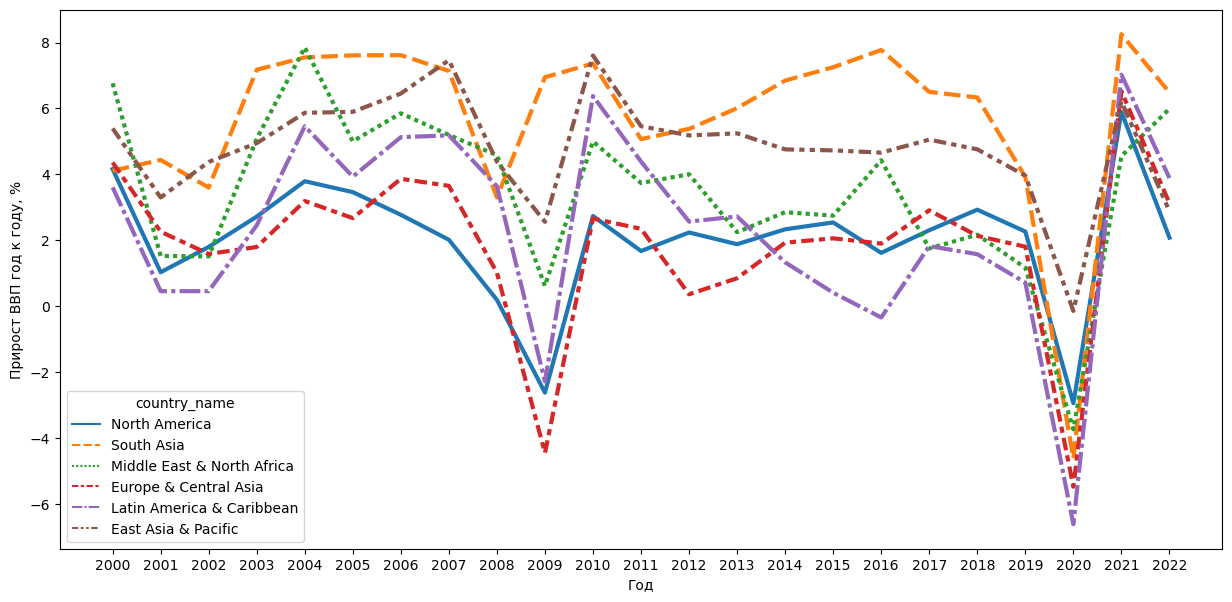

In [89]:
plt.figure(figsize=(15,7))
sns.lineplot(data=grp_growth_by_country[country_group], linewidth=3)
plt.xlabel("Год")
plt.ylabel("Прирост ВВП год к году, %");

 <center><img src="https://cdn.skyeng.ru/resources/image/skills/python/lesson1-1/3.png" /> 